## Figures

This notebook contains analysis and figure generation for all figures generated outside of QIIME 2

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.cluster.hierarchy import linkage

%matplotlib inline

Color palettes used in plotting:

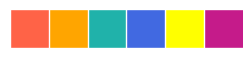

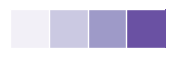

In [2]:
CST = ['tomato', 'orange', 'lightseagreen', 'royalblue', 'yellow','#c51b8a']
stage = ['#f2f0f7','#cbc9e2', '#9e9ac8', '#6a51a3']

#Visualizing
sns.palplot(CST, size=0.5)
sns.palplot(stage, size=0.5)

# Estrous Cycle Staging Study

General File Prep:

In [121]:
#Importing the mapping file with CST
mapping_Estrous = pd.read_table('Results_Files_Estrous_Stage/Qiime_Mapping_File_Estrous_Staging_CST.txt', index_col=0)

#Importing the relative abudance table for heatmaps
table_Estrous_L7 = pd.read_table('Results_Files_Estrous_Stage/reference_hit_updated_ContaminationRemoved_400Rare_L7_Rel.txt', 
                      header = 1, index_col=0)

#Importing the rarified table
table_Estrous_Rare = pd.read_table('Results_Files_Estrous_Stage/reference_hit_updated_ContaminationRemoved_400Rare.txt',
                                  header = 1, index_col=0)

In [4]:
#Selecting on the mice in the longitudinal study

mapping_Estrous_long = mapping_Estrous[mapping_Estrous['group_name'] =='longitudinal']

In [5]:
#Preparing the Relative Abundance table for optimal plotting

table_Estrous_L7 = table_Estrous_L7.T

table_Estrous_L7.drop([col for col, val in table_Estrous_L7.sum().iteritems() if val < 0.2], axis=1, inplace=True)

In [6]:
#Flipping the Rarified table

table_Estrous_Rare = table_Estrous_Rare.T

## Figure 1

In [7]:
#First we must make the eucledian linkage to cluster the heatmap by CST

Estrous_eucledian = linkage(table_Estrous_Rare, method='ward', metric='euclidean')

In [8]:
#Then we will map the colorbars

def CST_color(s):
    if s == 'I':
        return 'tomato'
    elif s == 'II':
        return 'orange'
    elif s == 'III':
        return 'lightseagreen'
    elif s == 'IV':
        return 'royalblue'
    elif s == 'V':
        return 'yellow'
    elif s == 'VI':
        return '#c51b8a'
    return '' 

def Estrous_Stage(s):
    if s == 'proestrus':
        return '#f2f0f7'
    elif s == 'estrus':
        return '#cbc9e2'
    elif s == 'metestrus':
        return '#9e9ac8'
    elif s == 'diestrus':
        return '#6a51a3'
    return ''

In [9]:
#Making color columns and renaming the labels to display

mapping_Estrous['CST'] = mapping_Estrous['CST_Euc'].apply(CST_color)

mapping_Estrous['Stage'] = mapping_Estrous['stage'].apply(Estrous_Stage)

#Concatenating
x = mapping_Estrous[['CST', 'Stage']]

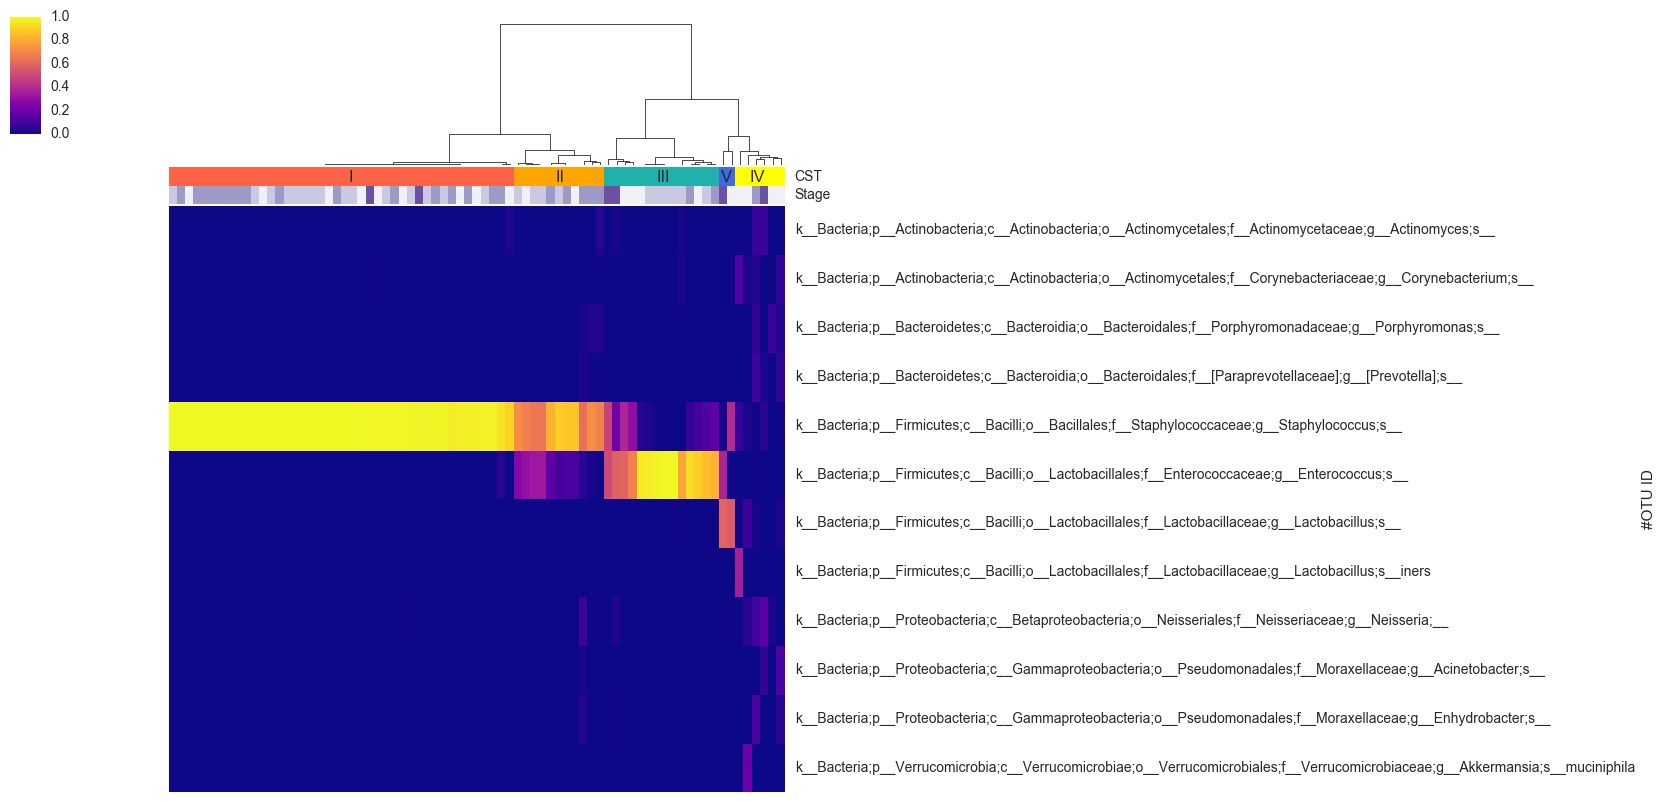

In [10]:
#Directly Plotting the table
cg = sns.clustermap(table_Estrous_L7.T, col_linkage=Estrous_eucledian, cmap = 'plasma', col_colors=x,
                    annot_kws={"size": 28}, row_cluster=False, xticklabels=False, figsize=(10,10))

plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

#Adding the numerals to indicate CST

plt.text(11, -0.41,'I', size=12)
plt.text(17.7, -0.41,'II', size=12)
plt.text(21, -0.41,'III', size=12)
plt.text(24, -0.41,'IV', size=12)
plt.text(23.1, -0.41,'V', size=12)

This doesn't look so nice! The table was edited in excel to shorten the taxa names and reorder the bacteria 

In [11]:
#Exporting the table to custom edit the sample names and select bacteria ordering

table_Estrous_L7.to_csv('Results_Files_Estrous_Stage/table_Estrous_L7_for_cleaning.txt', sep='\t')

#Reading in an edited table to re-create the plot

table_Estrous_L7_final = pd.read_table('Results_Files_Estrous_Stage/table_Estrous_L7_final.txt', index_col=0)

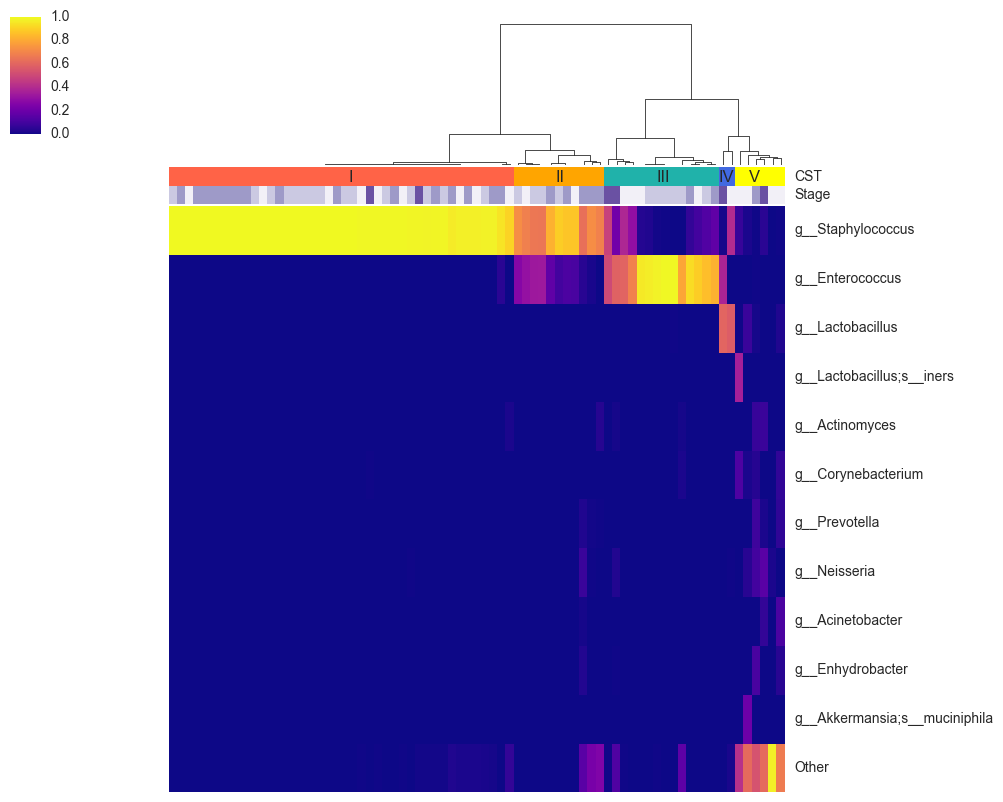

In [12]:
#Plotting the edited table
cg = sns.clustermap(table_Estrous_L7_final.T, col_linkage=Estrous_eucledian, cmap = 'plasma', col_colors=x,
                    annot_kws={"size": 28}, row_cluster=False, xticklabels=False, figsize=(10,10))

plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

#Adding the numbers to indicate CST

plt.text(11, -0.41,'I', size=12)
plt.text(17.7, -0.41,'II', size=12)
plt.text(21, -0.41,'III', size=12)
plt.text(24, -0.41,'V', size=12)
plt.text(23, -0.41,'IV', size=12)

## Figure 2

In [13]:
#Remove mice with only one sample
mapping_Estrous_long = mapping_Estrous_long[~mapping_Estrous_long['Mouse'].isin(['mouse 14', 'mouse 24'])]

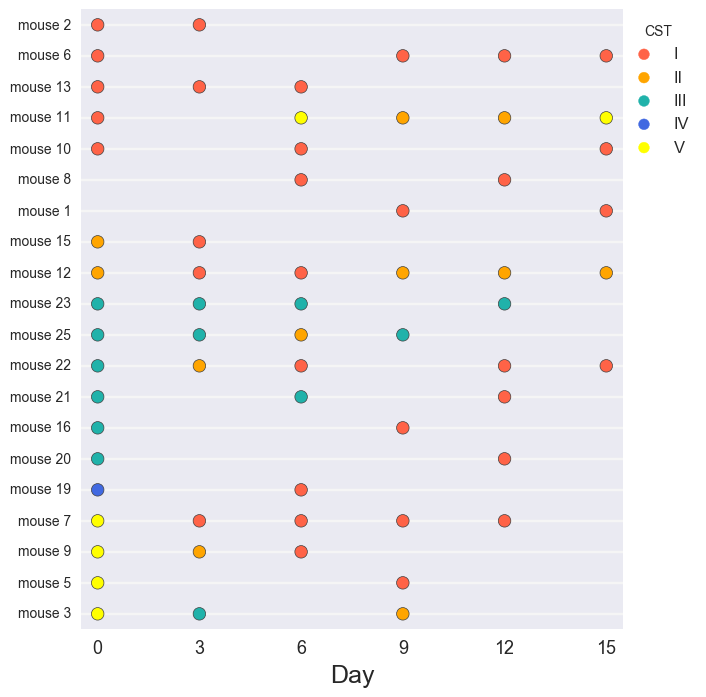

In [14]:
#Seaborn style to use
sns.set_style("dark")

fig, ax = plt.subplots(figsize=(7,8)) 

sns.stripplot(x = 'day', y = 'Mouse', hue = 'CST_Euc', palette = CST, data = mapping_Estrous_long, 
              ax = ax, order=['mouse 2', 'mouse 6', 'mouse 13', 'mouse 11', 'mouse 10','mouse 8', 'mouse 1', 'mouse 15', 'mouse 12', 
                  'mouse 23', 'mouse 25', 'mouse 22', 'mouse 21', 'mouse 16', 'mouse 20', 'mouse 19', 'mouse 7',
                 'mouse 9', 'mouse 5', 'mouse 3'], hue_order = ('I','II','III', 'IV','V'),linewidth = 0.5, size = 9, marker = 'o')

#Moving the legend
plt.legend(bbox_to_anchor=(1.15, 1), title='CST', fontsize='large')

#Editing the x-axis and labels
plt.xticks([0, 3, 6, 9, 12, 15], size=13)
plt.xlim(-0.5,15.5)

plt.xlabel('Day', size=18)
plt.ylabel('', size=18, labelpad = 10)

#Adding in the horizontal gray lines

for i in range(0,22):
    plt.axhline(y=i, color='whitesmoke', linestyle='-')

plt.savefig('CST_Stability.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

In [122]:
dist = pd.read_table('Results_Files_Estrous_Stage/host_subject_id_Distances.txt', index_col=0, header = -1)

In [123]:
dist = dist.T

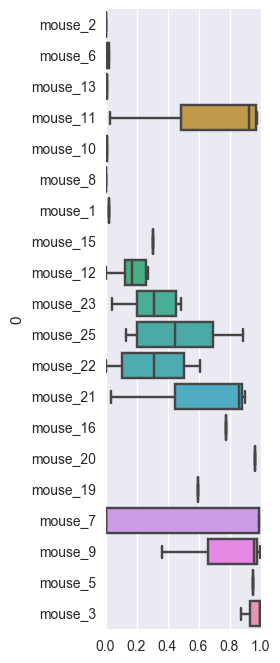

In [124]:
fig, ax = plt.subplots(figsize=(2,8)) 
sns.boxplot(data = dist[['mouse_2', 'mouse_6', 'mouse_13', 'mouse_11', 'mouse_10', 'mouse_8', 'mouse_1', 'mouse_15', 'mouse_12', 
                  'mouse_23', 'mouse_25', 'mouse_22', 'mouse_21', 'mouse_16', 'mouse_20', 'mouse_19', 'mouse_7',
                 'mouse_9', 'mouse_5', 'mouse_3']], ax = ax,
            orient='horizontal')
plt.savefig('CST_Stability_boxplots.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

## Figure 3

In [19]:
#Setting and order for plotting the estrous cycle 

order = ['proestrus', 'estrus', 'metestrus', 'diestrus']

#Reading in the original mapping file with all samples (not just ones with CST)

mapping_Estrous_All = pd.read_table('Raw_Files_Estrous_Stage/Qiime_Mapping_File.txt', index_col=0)

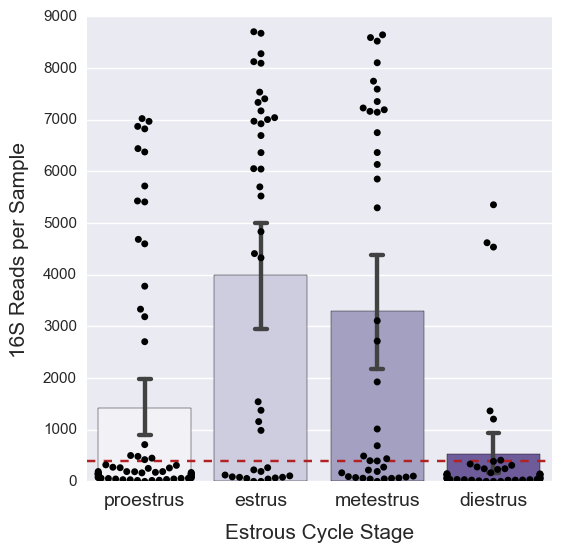

In [20]:
#Setting the seaborn plotting style
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(6,6)) 

#Two plots, a barplot and swarmplot, are plotted on top of each other on the same axis
sns.barplot(x='stage', y='reads', palette = stage, order = order,
            data=mapping_Estrous_All[mapping_Estrous_All['stage']!='not applicable'],capsize=0.1, ax=ax)

sns.swarmplot(x='stage', y='reads', color ='black', order = order, 
              data=mapping_Estrous_All[mapping_Estrous_All['stage']!='not applicable'], ax=ax)

plt.ylim(0,9000)
plt.xticks(size=14)
plt.yticks(size=11)

plt.xlabel('Estrous Cycle Stage', size = 15, labelpad = 10)
plt.ylabel('16S Reads per Sample', size = 15, labelpad = 10)

#Adding a line to indicate rarefaction depth
plt.axhline(y=400, color='firebrick', linestyle='--')

# GBS Pathogen Challenge Study

General File prep:

In [125]:
#Importing the mapping file with CST

mapping_GBS = pd.read_table('Results_Files_GBS_Challenge/Qiime_Mapping_File_GBS_Pathogen_Challenge_CST.txt',
                            index_col=0)

In [126]:
#Reading in the table with a pseduocount

table = pd.read_table('Results_Files_GBS_Challenge/reference_hit_updated_ContaminationRemoved_GBS_PBS_500Filtered_L7_pseudo.txt',
                     header=1, index_col=0)

In [127]:
table = table.T

In [24]:
#Make relative abundance
table['Total'] = table.sum(axis=1)
sumcol = table.pop('Total')
table = table.div(sumcol, axis=0)

In [128]:
s = table[['k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__']]
e = table[['k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__']]
b = table[['k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;__']]

s = s.rename(columns = {'k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__':'Staph'})
e = e.rename(columns = {'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__':'Enterococcus'})
b = b.rename(columns = {'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;__':'GBS'})

In [129]:
mapping_GBS = pd.merge(mapping_GBS, s, left_index=True, right_index=True)
mapping_GBS = pd.merge(mapping_GBS, e, left_index=True, right_index=True)
mapping_GBS = pd.merge(mapping_GBS, b, left_index=True, right_index=True)

In [130]:
mapping_GBS['Staph_Entero_Ratio'] = np.log(mapping_GBS['Staph']/mapping_GBS['Enterococcus'])
mapping_GBS['Staph_GBS_Ratio'] = np.log(mapping_GBS['Staph']/mapping_GBS['GBS'])
mapping_GBS['Entero_GBS_Ratio'] = np.log(mapping_GBS['Enterococcus']/mapping_GBS['GBS'])

In [131]:
#Loading in the first distances results from Qiime 2

distances = pd.read_table('Results_Files_GBS_Challenge/reference_hit_updated_ContaminationRemoved_GBS_PBS_500Rare_BrayCurtis_firstdist.txt',
                          index_col=0)

#Adding distances onto the mapping file

distance = pd.merge(mapping_GBS, distances, left_index=True, right_index=True)


## Figure 4

In [132]:
#Getting only the GBS mice

GBS = distance[distance['treatment_group']=='GBS']
GBS = GBS.copy()

#Changing CFU to integer 

GBS['pathogen_cfu_recovered'] = GBS.pathogen_cfu_recovered.astype(int)

In [133]:
mapping_GBS_only = mapping_GBS[mapping_GBS['treatment_group']=='GBS']
mapping_GBS_only_d0R = mapping_GBS_only[mapping_GBS_only['day']!=0]

mapping_GBS_only_d0R = mapping_GBS_only_d0R.copy()
mapping_GBS_only_d0R['pathogen_cfu_recovered'] = mapping_GBS_only_d0R.pathogen_cfu_recovered.astype(int)

In [134]:
sns.set_style('darkgrid')

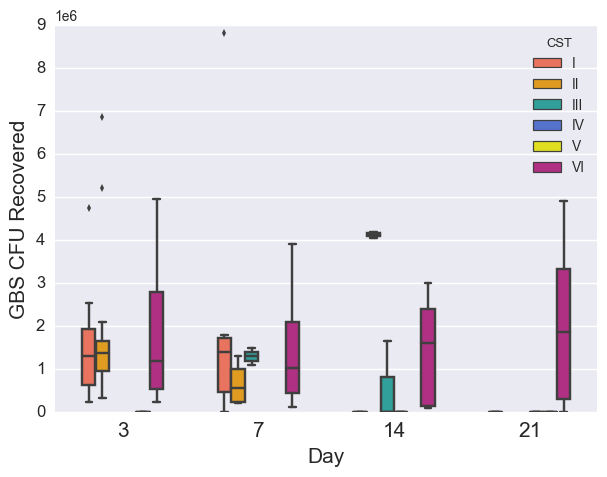

In [135]:
fig, ax = plt.subplots(figsize=(7,5)) 

sns.boxplot(x='day', y ='pathogen_cfu_recovered', hue='CST', data=mapping_GBS_only_d0R, width=0.6, fliersize = 4, 
            palette=CST, hue_order=('I', 'II', 'III','IV', 'V', 'VI'), ax=ax)

plt.xticks(size=15)
plt.yticks(size=12)

plt.ylabel('GBS CFU Recovered', size=15)
plt.xlabel('Day', size=15)

#Forcing Scientific notation on y-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(1,2))

#plt.title('GBS CFU Recovered by CST', size = 18)

plt.savefig('CFU.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

In [48]:
#Getting the tissue samples on different days

d_3t = mapping_GBS_only_d0R[mapping_GBS_only_d0R['tissue_day']=='3'].copy()
d_14t = mapping_GBS_only_d0R[mapping_GBS_only_d0R['tissue_day']=='14'].copy()
d_21t = mapping_GBS_only_d0R[mapping_GBS_only_d0R['tissue_day']=='21'].copy()


#Converting these to float

d_3t['uterus_CFU'] = d_3t['uterus_CFU'].astype(float)
d_3t['vagina_CFU'] = d_3t['vagina_CFU'].astype(float)
d_3t['cervix_CFU'] = d_3t['cervix_CFU'].astype(float)

d_14t['uterus_CFU'] = d_14t['uterus_CFU'].astype(float)
d_14t['vagina_CFU'] = d_14t['vagina_CFU'].astype(float)
d_14t['cervix_CFU'] = d_14t['cervix_CFU'].astype(float)

d_21t['uterus_CFU'] = d_21t['uterus_CFU'].astype(float)
d_21t['vagina_CFU'] = d_21t['vagina_CFU'].astype(float)
d_21t['cervix_CFU'] = d_21t['cervix_CFU'].astype(float)

In [50]:
#Editing palette for day 3
pal_d3 = ['tomato', 'orange', '#c51b8a']

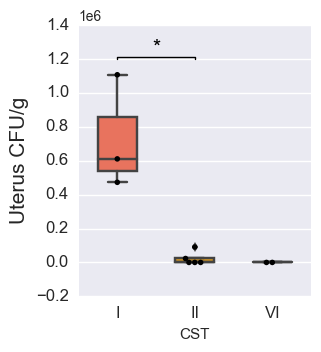

In [51]:
#Uterus CFU

fig, ax = plt.subplots(figsize=(3,3.5)) 

sns.boxplot(x='CST', y='uterus_CFU', order =('I', 'II', 'VI'), width =0.5, ax=ax, palette=pal_d3, data=d_3t)
sns.swarmplot(x='CST', y='uterus_CFU', order =('I', 'II', 'VI'), color='black', size=4, ax=ax, data=d_3t)

plt.ylabel('Uterus CFU/g', size=15)

plt.yticks(size=12)
plt.xticks(size=12)

#Forcing scientific notation of y-labels

plt.ticklabel_format(style='sci', axis='y', scilimits=(1,2))

#Adding significance bar

x1, x2 = 0, 1 
y, h, col = 1200000, 10000, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', size=15,va='bottom', color=col)

plt.savefig('Uterus.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

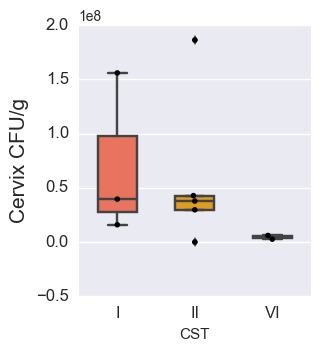

In [52]:
#Cervix 

fig, ax = plt.subplots(figsize=(3,3.5)) 

sns.boxplot(x='CST', y='cervix_CFU', order =('I', 'II', 'VI'), width =0.5, palette=pal_d3, data=d_3t)
sns.swarmplot(x='CST', y='cervix_CFU', order =('I', 'II', 'VI'), color='black',size=4, data=d_3t)

plt.yticks(size=12)
plt.xticks(size=12)

plt.ylabel('Cervix CFU/g', size=15)

plt.savefig('Cervix.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

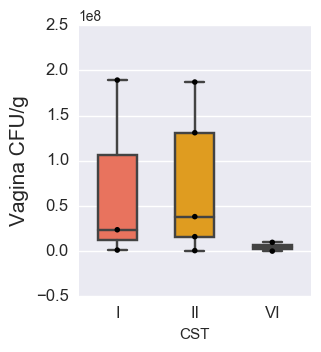

In [53]:
#Vagina 

fig, ax2 = plt.subplots(figsize=(3,3.5)) 

sns.boxplot(x='CST', y='vagina_CFU', order =('I', 'II', 'VI'), width =0.5, ax=ax2,palette=pal_d3, data=d_3t)
sns.swarmplot(x='CST', y='vagina_CFU', order =('I', 'II', 'VI'), color='black',ax=ax2,size=4, data=d_3t)

plt.yticks(size=12)
plt.xticks(size=12)

plt.ylabel('Vagina CFU/g', size=15)

plt.savefig('Vagina.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

In [54]:
pal_d14 = ['tomato', 'orange', 'lightseagreen', 'royalblue']

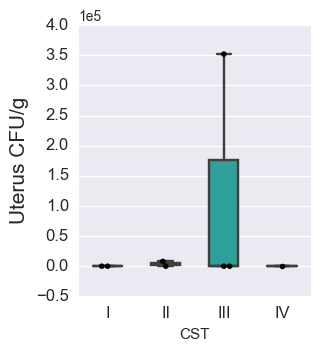

In [55]:
#Uterus CFU day 14

fig, ax = plt.subplots(figsize=(3,3.5)) 

sns.boxplot(x='CST', y='uterus_CFU', order =('I', 'II', 'III', 'IV'), width =0.5, ax=ax, palette=pal_d14, data=d_14t)
sns.swarmplot(x='CST', y='uterus_CFU', order =('I', 'II', 'III', 'IV'), color='black', size=4, ax=ax, data=d_14t)

plt.ylabel('Uterus CFU/g', size=15)

plt.yticks(size=12)
plt.xticks(size=12)

#Forcing scientific notation of y-labels

plt.ticklabel_format(style='sci', axis='y', scilimits=(1,2))

plt.savefig('Uterus_Day14.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

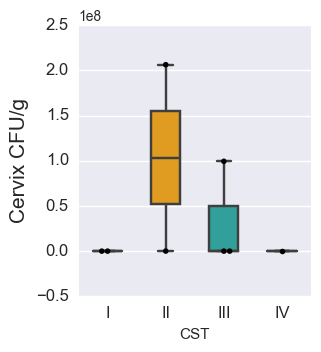

In [56]:
#Cervix CFU day 14

fig, ax = plt.subplots(figsize=(3,3.5)) 

sns.boxplot(x='CST', y='cervix_CFU', order =('I', 'II', 'III', 'IV'), width =0.5, ax=ax, palette=pal_d14, data=d_14t)
sns.swarmplot(x='CST', y='cervix_CFU', order =('I', 'II', 'III','IV'), color='black', size=4, ax=ax, data=d_14t)

plt.ylabel('Cervix CFU/g', size=15)

plt.yticks(size=12)
plt.xticks(size=12)

#Forcing scientific notation of y-labels

plt.ticklabel_format(style='sci', axis='y', scilimits=(1,2))

plt.savefig('Cervix_d14.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

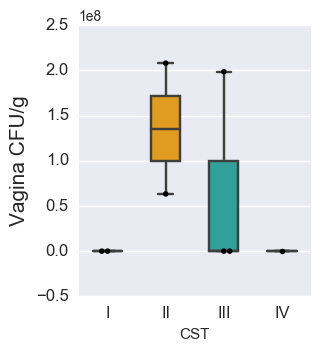

In [57]:
#Vagina CFU day 14

fig, ax = plt.subplots(figsize=(3,3.5)) 

sns.boxplot(x='CST', y='vagina_CFU', order =('I', 'II', 'III', 'IV'), width =0.5, ax=ax, palette=pal_d14, data=d_14t)
sns.swarmplot(x='CST', y='vagina_CFU', order =('I', 'II', 'III', 'IV'), color='black', size=4, ax=ax, data=d_14t)

plt.ylabel('Vagina CFU/g', size=15)

plt.yticks(size=12)
plt.xticks(size=12)

#Forcing scientific notation of y-labels

plt.ticklabel_format(style='sci', axis='y', scilimits=(1,2))

plt.savefig('Vagina_d14.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

In [58]:
pal_d21 = ['tomato','royalblue', 'yellow', '#c51b8a']

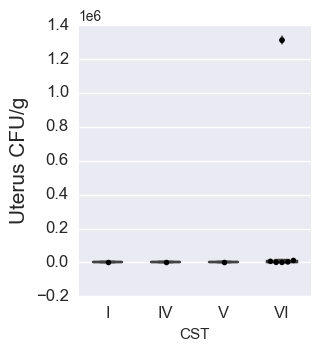

In [59]:
#Uterus CFU day 21

fig, ax = plt.subplots(figsize=(3,3.5)) 

sns.boxplot(x='CST', y='uterus_CFU', order =('I', 'IV', 'V', 'VI'), width =0.5, ax=ax, palette=pal_d21, data=d_21t)
sns.swarmplot(x='CST', y='uterus_CFU', order =('I', 'IV', 'V', 'VI'), color='black', size=4, ax=ax, data=d_21t)

plt.ylabel('Uterus CFU/g', size=15)

plt.yticks(size=12)
plt.xticks(size=12)

#Forcing scientific notation of y-labels

plt.ticklabel_format(style='sci', axis='y', scilimits=(1,2))


plt.savefig('Uterus_d21.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

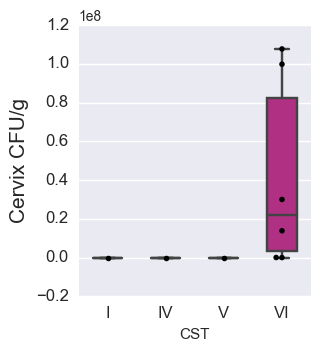

In [60]:
#Cervix CFU day 21

fig, ax = plt.subplots(figsize=(3,3.5)) 

sns.boxplot(x='CST', y='cervix_CFU', order =('I', 'IV', 'V', 'VI'), width =0.5, ax=ax, palette=pal_d21, data=d_21t)
sns.swarmplot(x='CST', y='cervix_CFU', order =('I', 'IV', 'V', 'VI'), color='black', size=4, ax=ax, data=d_21t)

plt.ylabel('Cervix CFU/g', size=15)

plt.yticks(size=12)
plt.xticks(size=12)

#Forcing scientific notation of y-labels

plt.ticklabel_format(style='sci', axis='y', scilimits=(1,2))


plt.savefig('Cervix_d21.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

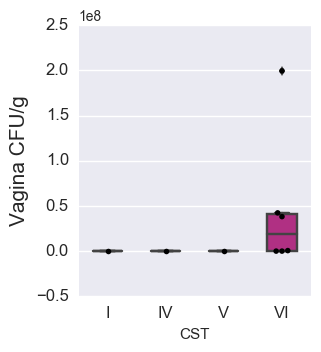

In [61]:
#Vagina CFU day 21

fig, ax = plt.subplots(figsize=(3,3.5)) 

sns.boxplot(x='CST', y='vagina_CFU', order =('I', 'IV', 'V', 'VI'), width =0.5, ax=ax, palette=pal_d21, data=d_21t)
sns.swarmplot(x='CST', y='vagina_CFU', order =('I', 'IV', 'V', 'VI'), color='black', size=4, ax=ax, data=d_21t)

plt.ylabel('Vagina CFU/g', size=15)

plt.yticks(size=12)
plt.xticks(size=12)

#Forcing scientific notation of y-labels

plt.ticklabel_format(style='sci', axis='y', scilimits=(1,2))

#Adding significance bar

plt.savefig('Vagina_d21.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

In [62]:
from scipy import stats

In [63]:
#For the tissue samples

ut_3_1 = d_3t[d_3t['CST']=='I']['uterus_CFU']
ut_3_2 = d_3t[d_3t['CST']=='II']['uterus_CFU']
ut_3_6 = d_3t[d_3t['CST']=='VI']['uterus_CFU']

ut_14_1 = d_14t[d_14t['CST']=='I']['uterus_CFU']
ut_14_2 = d_14t[d_14t['CST']=='II']['uterus_CFU']
ut_14_3 = d_14t[d_14t['CST']=='III']['uterus_CFU']
ut_14_4 = d_14t[d_14t['CST']=='IV']['uterus_CFU']

ut_21_1 = d_21t[d_21t['CST']=='I']['uterus_CFU']
ut_21_4 = d_21t[d_21t['CST']=='IV']['uterus_CFU']
ut_21_5 = d_21t[d_21t['CST']=='V']['uterus_CFU']
ut_21_6 = d_21t[d_21t['CST']=='VI']['uterus_CFU']

v_3_1 = d_3t[d_3t['CST']=='I']['vagina_CFU']
v_3_2 = d_3t[d_3t['CST']=='II']['vagina_CFU']
v_3_6 = d_3t[d_3t['CST']=='VI']['vagina_CFU']

v_14_1 = d_14t[d_14t['CST']=='I']['vagina_CFU']
v_14_2 = d_14t[d_14t['CST']=='II']['vagina_CFU']
v_14_3 = d_14t[d_14t['CST']=='III']['vagina_CFU']
v_14_4 = d_14t[d_14t['CST']=='IV']['vagina_CFU']

v_21_1 = d_21t[d_21t['CST']=='I']['vagina_CFU']
v_21_4 = d_21t[d_21t['CST']=='IV']['vagina_CFU']
v_21_5 = d_21t[d_21t['CST']=='V']['vagina_CFU']
v_21_6 = d_21t[d_21t['CST']=='VI']['vagina_CFU']

c_3_1 = d_3t[d_3t['CST']=='I']['cervix_CFU']
c_3_2 = d_3t[d_3t['CST']=='II']['cervix_CFU']
c_3_6 = d_3t[d_3t['CST']=='VI']['cervix_CFU']

c_14_1 = d_14t[d_14t['CST']=='I']['cervix_CFU']
c_14_2 = d_14t[d_14t['CST']=='II']['cervix_CFU']
c_14_3 = d_14t[d_14t['CST']=='III']['cervix_CFU']
c_14_4 = d_14t[d_14t['CST']=='IV']['cervix_CFU']

c_21_1 = d_21t[d_21t['CST']=='I']['cervix_CFU']
c_21_4 = d_21t[d_21t['CST']=='IV']['cervix_CFU']
c_21_5 = d_21t[d_21t['CST']=='V']['cervix_CFU']
c_21_6 = d_21t[d_21t['CST']=='VI']['cervix_CFU']

In [179]:
stats.mannwhitneyu(v_14_1, v_14_3)

MannwhitneyuResult(statistic=2.0, pvalue=0.34154569915480437)

In [64]:
CFU = mapping_GBS[mapping_GBS['pathogen_cfu_recovered'] != 'not applicable'].copy()

In [65]:
CFU['pathogen_cfu_recovered'] = CFU['pathogen_cfu_recovered'].astype(float)

In [66]:
CFU['pathogen_cfu_recovered'] = CFU['pathogen_cfu_recovered'] +1

In [67]:
CFU['Staph_CFU_Ratio'] = np.log(CFU['Staph']/CFU['pathogen_cfu_recovered'])
CFU['Entero_CFU_Ratio'] = np.log(CFU['Enterococcus']/CFU['pathogen_cfu_recovered'])

In [68]:
distance_CFU = pd.merge(CFU, distances, left_index=True, right_index=True)

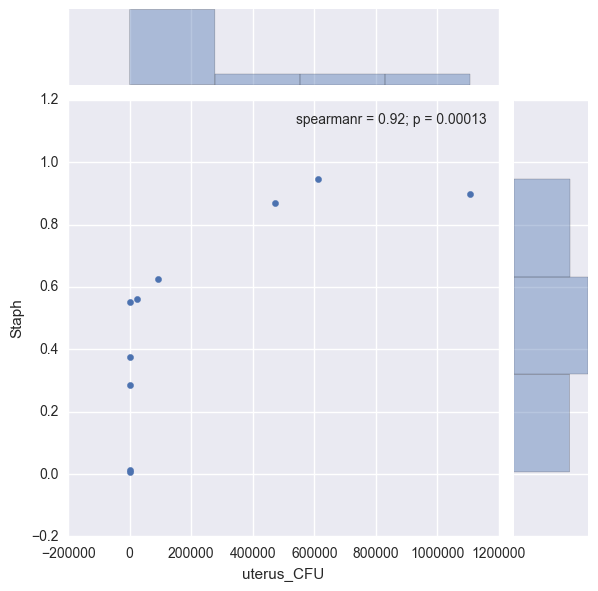

In [69]:
sns.jointplot(data = d_3t, y='Staph', x="uterus_CFU", stat_func=stats.spearmanr)

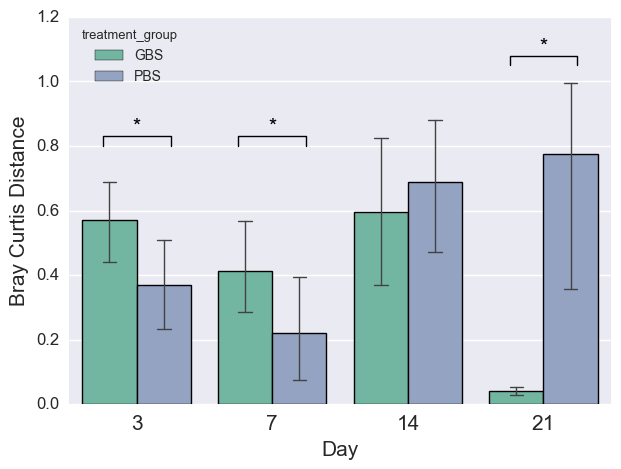

In [70]:
colors = ['#66c2a5', '#8da0cb']

fig, ax = plt.subplots(figsize=(7,5)) 

sns.barplot(x='day', y ='Distance', hue = 'treatment_group', palette=colors, data=distance, errwidth=1, capsize = 0.1, 
              ax=ax)

plt.setp(ax.patches, linewidth=1)

plt.ylabel('Bray Curtis Distance', size=15)
plt.xlabel('Day', size=15)

plt.xticks(size=15)
plt.yticks(size=12)

#plt.title('Pairwise Distance within Mice between Timepoints', y=1.05,size =20)


#Adding significance bars

x1, x2 = -0.25, 0.25 
y, h, col = 0.8, 0.03, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', size=15,va='bottom', color=col)

x1, x2 = 0.75, 1.25 
y, h, col = 0.8, 0.03, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', size=15,va='bottom', color=col)

x1, x2 = 2.75, 3.25 
y, h, col = 1.05, 0.03, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', size=15,va='bottom', color=col)

plt.savefig('Distance.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

In [71]:
distance_GBS_only = distance[distance['treatment_group']=='GBS']
distance_PBS_only = distance[distance['treatment_group']=='PBS']

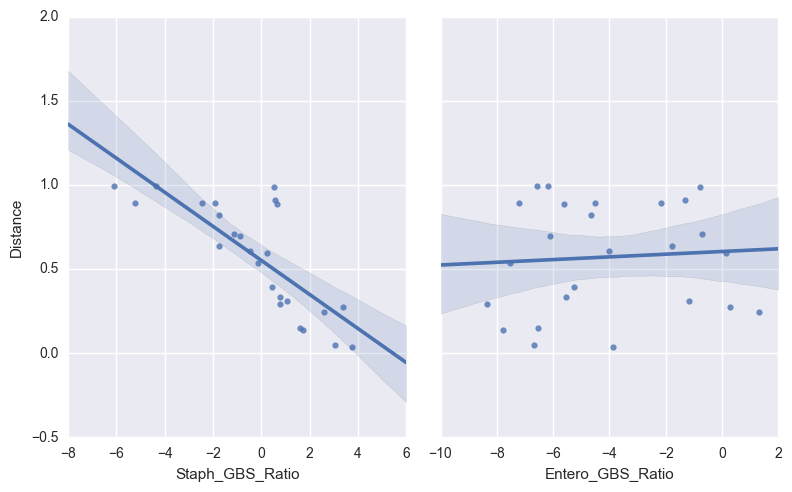

In [72]:
sns.pairplot(distance_GBS_only[distance_GBS_only['day']==3], x_vars=["Staph_GBS_Ratio","Entero_GBS_Ratio"], 
             y_vars=["Distance"],size=5, aspect=.8, kind="reg")
plt.savefig('Distance_GBS_Day3.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

In [73]:
stats.spearmanr(distance_GBS_only[distance_GBS_only['day']==3]['Staph_GBS_Ratio'],
                distance_GBS_only[distance_GBS_only['day']==3]['Distance'])

SpearmanrResult(correlation=-0.82746683584909086, pvalue=3.3591014635262203e-07)

In [74]:
stats.spearmanr(distance_GBS_only[distance_GBS_only['day']==3]['Entero_GBS_Ratio'],
                distance_GBS_only[distance_GBS_only['day']==3]['Distance'])

SpearmanrResult(correlation=0.051933065011449217, pvalue=0.80526617094556663)

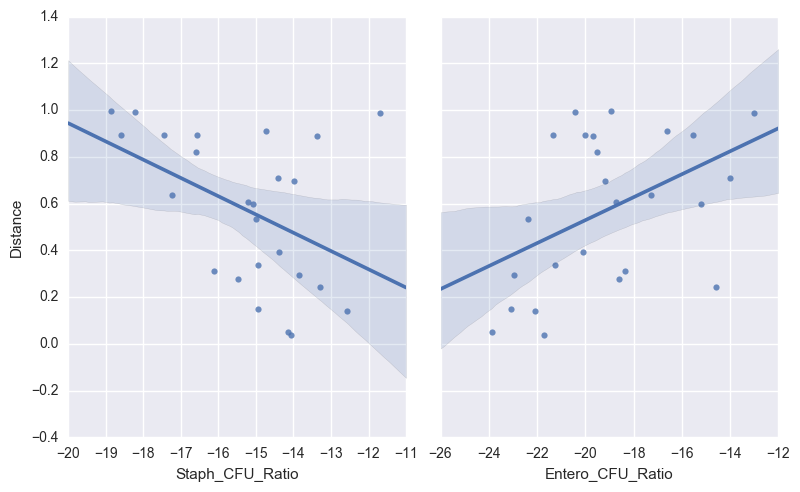

In [75]:
sns.pairplot(distance_CFU[distance_CFU['day']==3], x_vars=["Staph_CFU_Ratio", "Entero_CFU_Ratio"], 
             y_vars=["Distance"],size=5, aspect=.8, kind="reg")
plt.savefig('Distance_CFU_Day3.svg', dpi= 500, bbox_inches='tight', pad_inches=0.5, 
            orientation='portrait', format = 'svg')

In [76]:
stats.spearmanr(distance_CFU[distance_CFU['day']==3]['Staph_CFU_Ratio'],
                distance_CFU[distance_CFU['day']==3]['Distance'])

SpearmanrResult(correlation=-0.45470283587802202, pvalue=0.022392486091964762)

In [77]:
stats.spearmanr(distance_CFU[distance_CFU['day']==3]['Entero_CFU_Ratio'],
                distance_CFU[distance_CFU['day']==3]['Distance'])

SpearmanrResult(correlation=0.42315830750069727, pvalue=0.035061789662847474)

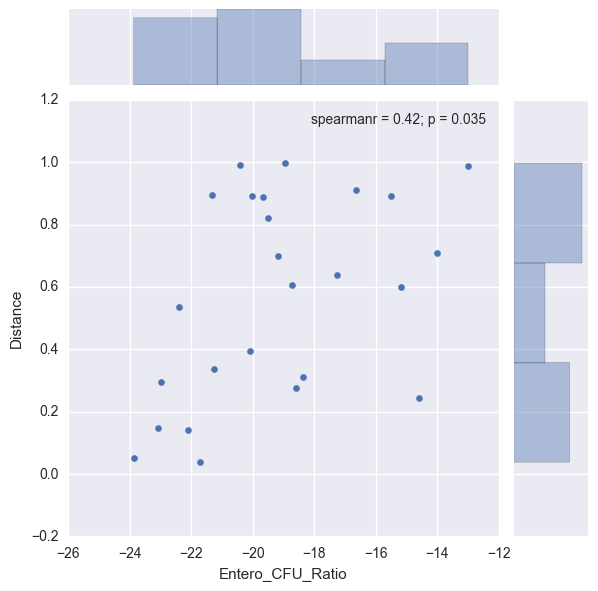

In [78]:
sns.jointplot(x='Entero_CFU_Ratio', y='Distance', stat_func=stats.spearmanr, data=distance_CFU[distance_CFU['day']==3])

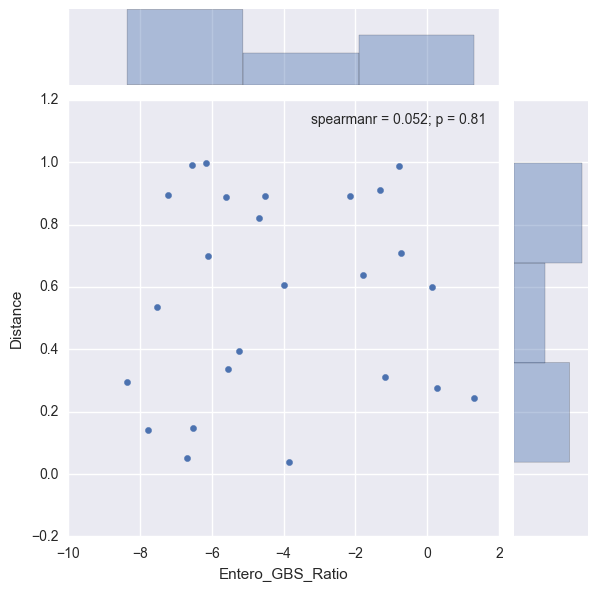

In [79]:
sns.jointplot(x='Entero_GBS_Ratio', y='Distance', stat_func=stats.spearmanr, data=distance_GBS_only[distance_GBS_only['day']==3])

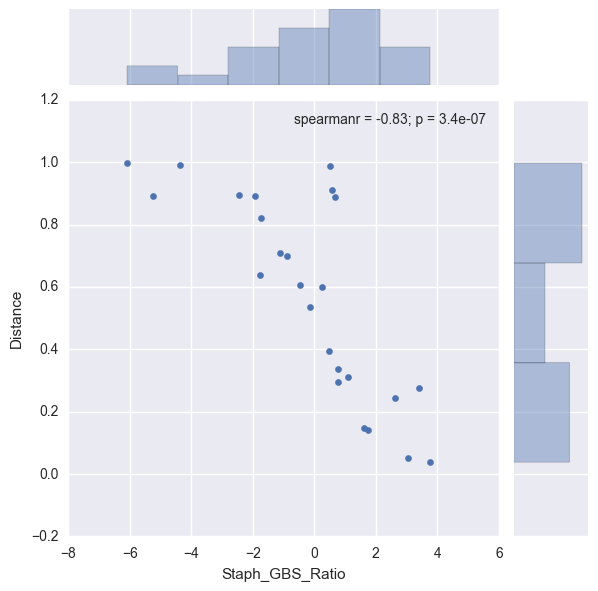

In [80]:
sns.jointplot(x='Staph_GBS_Ratio', y='Distance', stat_func=stats.spearmanr, 
              data=distance_GBS_only[distance_GBS_only['day']==3])


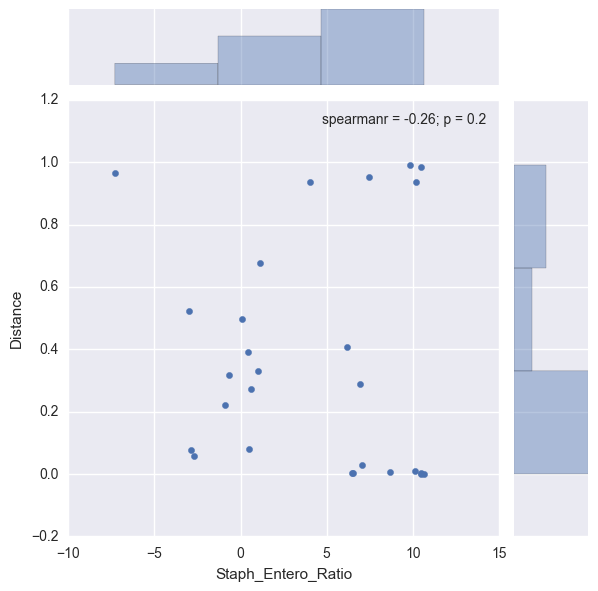

In [81]:
sns.jointplot(x='Staph_Entero_Ratio', y='Distance', stat_func=stats.spearmanr, data=distance_PBS_only[distance_PBS_only['day']==3])

In [82]:
full = pd.read_table('Results_Files_GBS_Challenge/CFU_D21_Analysis.txt', index_col=0)

In [84]:
full_d0R = full[full['day']!=0].copy()

In [85]:
full_d0R['pathogen_cfu_recovered'] = full_d0R['pathogen_cfu_recovered'].astype(float)

In [86]:
full_d0R['log_pathogen_cfu_recovered'] = np.log(full_d0R['pathogen_cfu_recovered'] + 1)

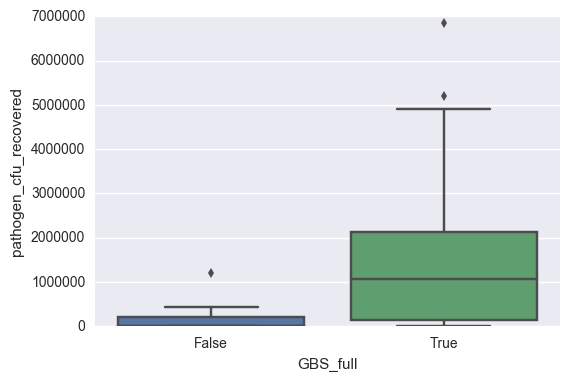

In [89]:
sns.boxplot(x='GBS_full', y='pathogen_cfu_recovered', data=full_d0R)

In [91]:
GBS_true = full_d0R[full_d0R['GBS_full']==True]
GBS_false = full_d0R[full_d0R['GBS_full']==False]

In [92]:
stats.ttest_ind(GBS_true['pathogen_cfu_recovered'], GBS_false['pathogen_cfu_recovered'])

Ttest_indResult(statistic=2.4655326085841218, pvalue=0.018885394464620203)

# Merged Studies 

## Supplementary Figure 1

In [110]:
mapping_merged = pd.read_table('Merged_Studies/Merged_Mapping_CST.txt', index_col=0)

table_Merged_Rel = pd.read_table('Merged_Studies/Merged_Table_Contamination_Removed_500Rare_L7_Rel.txt', 
                                header=1, index_col=0)

table_Merged_Rare = pd.read_table('Merged_Studies/Merged_Table_Contamination_Removed_500Rare.txt',
                                 header=1, index_col=0)

In [111]:
table_Merged_Rel = table_Merged_Rel.T
table_Merged_Rare = table_Merged_Rare.T

In [112]:
#Filtering out lower abudance bacteria for heatmap

table_Merged_Rel.drop([col for col, val in table_Merged_Rel.sum().iteritems() if val < 0.5], axis=1, inplace=True)

In [113]:
eucledian_Merged = linkage(table_Merged_Rare, method='ward', metric='euclidean')

In [114]:
def Study(s):
    if s == 10911:
        return 'navy'
    elif s == 11441:
        return '#d8daeb'
    return ''

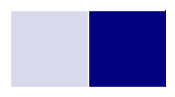

In [115]:
study_palette = ['#d8daeb', 'navy']
sns.palplot(study_palette)

In [116]:
#Dropping any samples without a CST

merged_CST = mapping_merged[mapping_merged['CST_std']!=np.NaN]

In [117]:
#Making the colormaps
merged_CST['CST'] = merged_CST['CST_std'].apply(CST_color)
merged_CST['Dataset'] = merged_CST['qiita_study_id'].apply(Study)

In [118]:
y = merged_CST[['CST','Dataset']]

In [119]:
#Export the relative abundance table to shorted taxa names, re-order bacteria, etc.

table_Merged_Rel.to_csv('Merged_Studies/Merged_Table_Heatmap_edit.txt', sep='\t')

#Read in the edited file

table_Merged_Rel_Final = pd.read_table('Merged_Studies/Merged_Table_Heatmap_Final.txt', index_col=0)

[None, None, None, None, None, None, None, None, None, None, None, None]

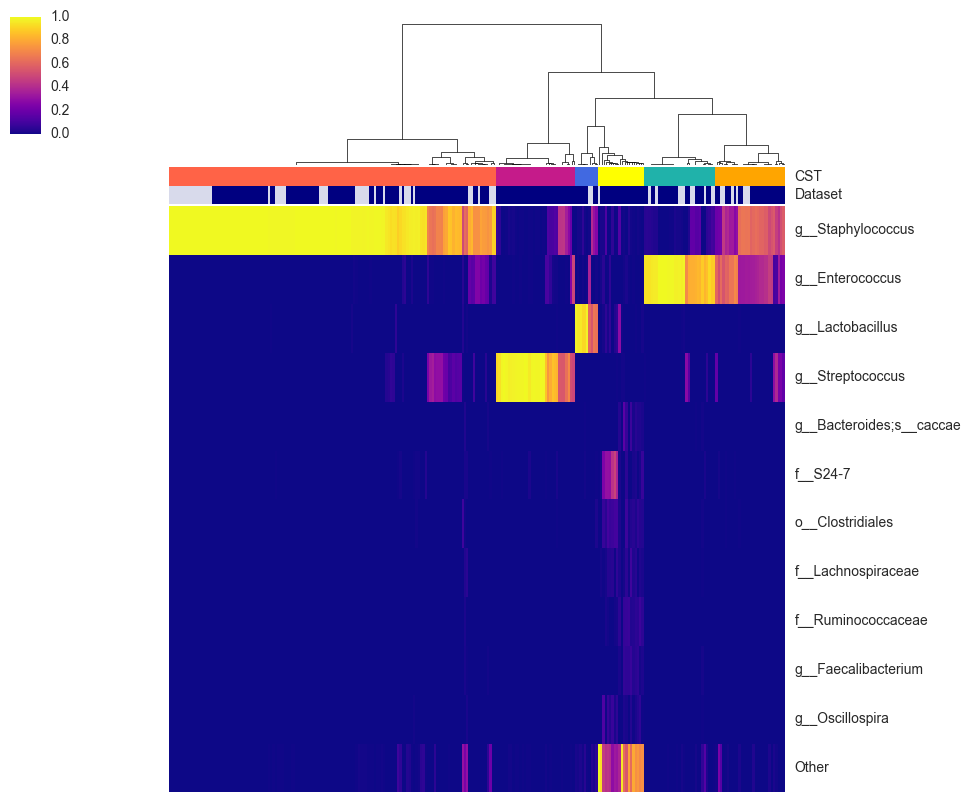

In [120]:
cg = sns.clustermap(table_Merged_Rel_Final.T, col_linkage=eucledian_Merged, cmap = 'plasma', col_colors=y,
                    annot_kws={"size": 28}, row_cluster=False, xticklabels=False, figsize=(10,10))

plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.savefig('Heatmap_Merged.svg', dpi= 100,bbox_inches='tight',pad_inches=0.5, orientation='portrait',format = 'svg')